# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [42]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
from sklearn.linear_model import LinearRegression
DB = data['Direct_Bilirubin']
TB = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(TB).reshape(-1,1), DB)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.18116743679724934
slope: [0.39557996]


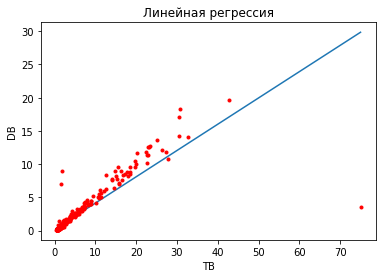

In [5]:
plt.xlabel('TB')
plt.ylabel('DB')
plt.title('Линейная регрессия')
x = np.linspace(min(TB), max(TB), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(TB, DB, 'r.')
plt.show()

In [6]:
model.predict(np.array([10.9]).reshape(-1, 1))

array([4.49298903])

In [23]:
TB[100:105].values

array([0.6, 0.7, 0.9, 0.8, 0.5])

In [24]:
model.predict(TB[100:105].values.reshape(-1, 1))

array([0.41851541, 0.45807341, 0.5371894 , 0.49763141, 0.37895742])

In [25]:
DB[100:105].values

array([0.2, 0.2, 0.2, 0.2, 0.1])

In [7]:
model.predict(np.array([0.7]).reshape(-1, 1))

array([0.45807341])

In [9]:
model.predict(np.array([7.3]).reshape(-1, 1))

array([3.06890116])

In [10]:
model.predict(np.array([3.9]).reshape(-1, 1))

array([1.72392929])

### Для выбранных точек модель предсказывает значения, которые в ряде случаев отличаются от фактических. Это связано с тем, что регрессия одномерная и не учитывает всю совокупность переменных.

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

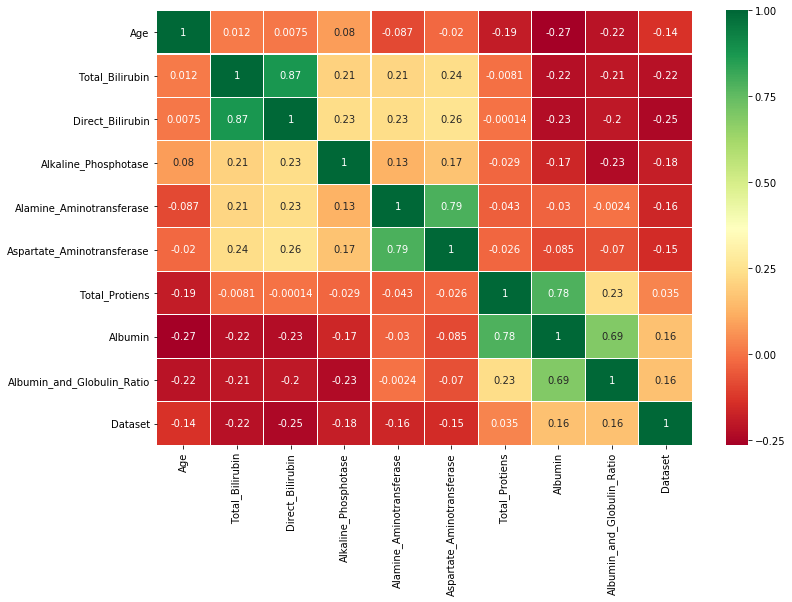

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## Максимальная линейная зависимость наблюдается между Dataset и Direct_Bilirubin (-0,25) и Dataset и Total_Bilirubin (-0,22). Но Direct_Bilirubin и Total_Bilirubin сильно коррелируют между собой (0,87), поэтому в качестве третьей переменной для многомерной регрессии возьмем Alkaline Phosphotase (-0,18)

In [28]:
DB = data['Direct_Bilirubin']
AP = data['Alkaline_Phosphotase']
Dataset = data['Dataset']
x = np.vstack([np.array(DB), np.array(AP)]).T
print('x - это двумерная матрица, где колонки - это DB и AP : ')
print(x[:3])
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это DB и AP : 
[[1.00e-01 1.87e+02]
 [5.50e+00 6.99e+02]
 [4.10e+00 4.90e+02]]


In [29]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.4105809528676787
slope: [-0.03455122 -0.00025048]


In [30]:
print(max(data['Direct_Bilirubin']), min(data['Direct_Bilirubin']))
print(max(data['Alkaline_Phosphotase']), min(data['Direct_Bilirubin']))

19.7 0.1
2110 0.1


In [36]:
print('Предсказание модели: ', model.predict(x[0:5]))

Предсказание модели:  [1.3602853  1.04546081 1.14618371 1.35117235 1.2926341 ]


In [35]:
Dataset[0:5].values

array([1, 1, 1, 1, 1], dtype=int64)

### В описании датасета нет данных о том, какой класс - 1 или 2 соответствует факту заболевания. Допустим, 1 - здоров, 2 - болен.  Для класса 1 (пациент здоров) модель достаточно точно предсказывает результат на этой выборке. Для того, чтобы протестировать, насколько точно модель предсказывает факт болезни, отфильтруем по классу 2.

In [44]:
data_2 = data[data.Dataset == 2]
DB_2 = data_2['Direct_Bilirubin']
AP_2 = data_2['Alkaline_Phosphotase']
Dataset_2 = data_2['Dataset']
x_2 = np.vstack([np.array(DB_2), np.array(AP_2)]).T
print('Предсказание модели: ', model.predict(x_2[0:5]))

Предсказание модели:  [1.34961779 1.3225655  1.36128723 1.35197546 1.35507679]


In [45]:
Dataset_2[0:5].values

array([2, 2, 2, 2, 2], dtype=int64)

### Для данной подвыборки качество предсказания невысокое.

Посчитать квартили для всех колонок. 

In [32]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

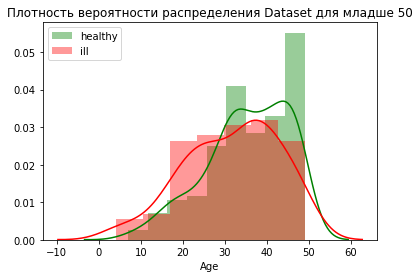

In [54]:
age_less_50_dataset_1 = data[(data['Age'] < 50) & (data['Dataset'] == 1)]['Age']
age_less_50_dataset_2 = data[(data['Age'] < 50) & (data['Dataset'] == 2)]['Age']
sns.distplot(age_less_50_dataset_1, color='green', label='healthy')
sns.distplot(age_less_50_dataset_2, color='red', label='ill')
plt.title('Плотность вероятности распределения Dataset для младше 50')
plt.legend()
plt.show()

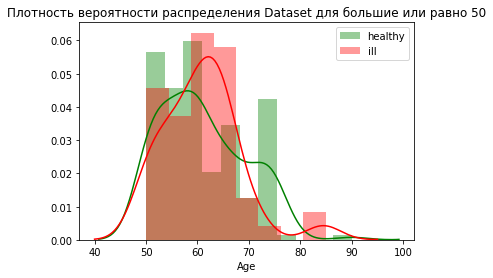

In [55]:
age_older_50_dataset_1 = data[(data['Age'] >= 50) & (data['Dataset'] == 1)]['Age']
age_older_50_dataset_2 = data[(data['Age'] >= 50) & (data['Dataset'] == 2)]['Age']
sns.distplot(age_older_50_dataset_1, color='green', label='healthy')
sns.distplot(age_older_50_dataset_2, color='red', label='ill')
plt.title('Плотность вероятности распределения Dataset для большие или равно 50')
plt.legend()
plt.show()

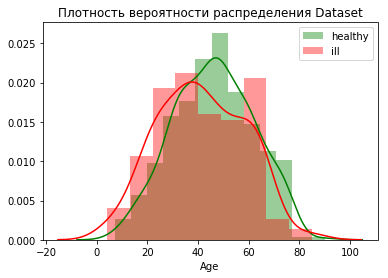

In [57]:
age_older_50_dataset_1 = data[(data['Dataset'] == 1)]['Age']
age_older_50_dataset_2 = data[(data['Dataset'] == 2)]['Age']
sns.distplot(age_older_50_dataset_1, color='green', label='healthy')
sns.distplot(age_older_50_dataset_2, color='red', label='ill')
plt.title('Плотность вероятности распределения Dataset')
plt.legend()
plt.show()

In [78]:
age_less_50_dataset = data[(data['Age'] < 50)]['Age']
print('Less 50, Age mean: ', age_less_50_dataset.mean())
print('Less 50, Age quantile: ', age_less_50_dataset.quantile([.5]))
age_less_50_dataset = data[(data['Age'] < 50)]['Dataset']
print('Less 50, Dataset mean: ', age_less_50_dataset.mean())
print('Less 50, Dataset quantile: ', age_less_50_dataset.quantile([.5]))

Less 50, Age mean:  34.18130311614731
Less 50, Age quantile:  0.5    35.0
Name: Age, dtype: float64
Less 50, Dataset mean:  1.3172804532577904
Less 50, Dataset quantile:  0.5    1.0
Name: Dataset, dtype: float64


In [79]:
age_less_50_dataset = data[(data['Age'] >= 50)]['Age']
print('Older 50, Age mean: ', age_less_50_dataset.mean())
print('Older 50, Age quantile: ', age_less_50_dataset.quantile([.5]))
age_less_50_dataset = data[(data['Age'] >= 50)]['Dataset']
print('Older 50, Dataset mean: ', age_less_50_dataset.mean())
print('Older 50, Dataset quantile: ', age_less_50_dataset.quantile([.5]))

Older 50, Age mean:  60.96086956521739
Older 50, Age quantile:  0.5    60.0
Name: Age, dtype: float64
Older 50, Dataset mean:  1.2391304347826086
Older 50, Dataset quantile:  0.5    1.0
Name: Dataset, dtype: float64


### Сравнивая средние значения Dataset, видим, что в возрастной группе младше 50 лет среднее значение Dataset выше, чем в возрастной группе старше 50 лет. Это указывает на тот факт, что люди младше 50 лет болеют чаще.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

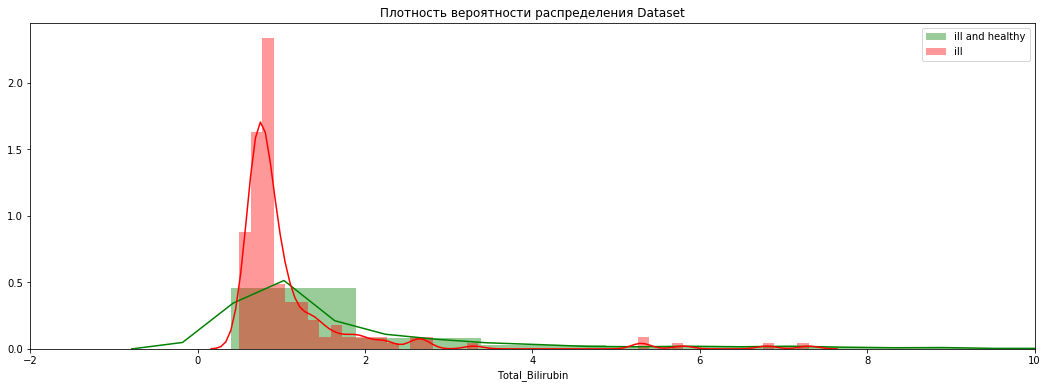

In [69]:
plt.figure(figsize=(18, 6))
TB_dataset_1 = data['Total_Bilirubin']
TB_dataset_2 = data[(data['Dataset'] == 2)]['Total_Bilirubin']
sns.distplot(TB_dataset_1, color='green', label='ill and healthy', bins=50)
sns.distplot(TB_dataset_2, color='red', label='ill', bins=50)
plt.xlim(-2, 10)
plt.title('Плотность вероятности распределения Dataset')
plt.legend()
plt.show()

In [62]:
data_TB_ill = data[(data['Dataset'] == 2)]['Total_Bilirubin']
stats.ttest_1samp(data_TB_ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012505, pvalue=3.180002804533163e-64)

### pvalue стремится к нулю, это значение существенно меньше стандартной ошибки 0.05. Поэтому отвергаем нулевую гипотезу о равенстве среднего значения Тотал_Билирубин для больных людей и генеральной совокупности

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [80]:
healthy_TB = data[data['Dataset']==1]['Total_Bilirubin']

ill_TB = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(healthy_TB, ill_TB)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

### t-value равно 5.4, pvalue=7.8e-08, поэтому группы статистически отличаются

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [84]:
age_young = data[(data['Age']<=30) & (data['Age']>1)]['Dataset']

age_adult = data[(data['Age']<=55) & (data['Age']>30)]['Dataset']

age_old = data[data['Age']>55]['Dataset']

stats.f_oneway(age_young, age_adult, age_old)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

### Поскольку результат pvalue меньше 0.05, отвергаем нулевую гипотезу о том, что нет различий у групп разных возрастов.

Вопросы задавать на почту yustiks@gmail.com